<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/lectures/machine_learning/ns_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# No supervisado I

## Clustering


**Clustering** es el proceso de agrupar objetos en conjuntos de acuerdo con su similitud, de modo que los elementos dentro de un mismo grupo compartan características comunes. Es una técnica clave en la minería de datos exploratoria y ampliamente utilizada en el análisis estadístico de datos para descubrir patrones y relaciones ocultas en los datos.

<img src="https://media.geeksforgeeks.org/wp-content/uploads/merge3cluster.jpg" width = "600" align="center"/>



## K-means

### Teoría

El algoritmo [K-means](https://es.wikipedia.org/wiki/K-means) (MacQueen, 1967) agrupa las observaciones en un número predefinido de $ k $ clusters, minimizando la suma de las varianzas internas de los clusters.

Existen varias implementaciones de este algoritmo, siendo Lloyd's el enfoque más común. En la bibliografía, la varianza interna de los clusters se menciona frecuentemente como "inertia", "within-cluster sum-of-squares" o "varianza intra-cluster".

Consideremos los conjuntos $ C_1, \dots, C_k $, que representan los índices de las observaciones en cada uno de los clusters. Por ejemplo, $ C_1 $ contiene los índices de las observaciones agrupadas en el primer cluster. Se utiliza la notación $ i \in C_k $ para indicar que la observación $ i $ pertenece al cluster $ k $. Estos conjuntos cumplen dos propiedades:

- $ C_1 \cup C_2 \cup \dots \cup C_k = \{1, \dots, n\} $: toda observación está asignada a un cluster.
- $ C_i \cap C_j = \emptyset $ para todo $ i \neq j $: los clusters son disjuntos; una observación no puede pertenecer a más de un cluster a la vez.

El objetivo del algoritmo es minimizar la suma de las distancias cuadradas entre cada observación y el centroide de su cluster. Matemáticamente, esto se expresa como:

$$
(P) \ \text{Minimizar } f(C_l, \mu_l) = \sum_{l=1}^k \sum_{x_n \in C_l} ||x_n - \mu_l ||^2 \text{, respecto a } C_l, \mu_l,
$$

donde $ C_l $ es el conjunto de observaciones en el cluster $ l $-ésimo y $ \mu_l $ es su centroide.

<img src="https://editor.analyticsvidhya.com/uploads/56854k%20means%20clustering.png" width="800" align="center"/>

### Algoritmo

1. Establecer el número de clusters $ k $.
2. Seleccionar aleatoriamente $ k $ observaciones del conjunto de datos como centroides iniciales.
3. Asignar cada observación al centroide más cercano.
4. Recalcular el centroide de cada cluster.

Repetir los pasos 3 y 4 hasta que las asignaciones no cambien o se alcance el número máximo de iteraciones establecido.

Este problema es NP-hard, lo que significa que es computacionalmente difícil de resolver en tiempo polinomial, colocándolo entre los problemas más complejos de la clase NP.

### Ventajas y desventajas

K-means es un método de clustering rápido y sencillo, ampliamente utilizado, aunque presenta algunas limitaciones:

- **Número de clusters**: Requiere especificar $ k $ de antemano, lo que puede ser desafiante sin información adicional. Métodos como "elbow" o "silhouette" pueden orientar, pero son aproximados.
  
- **Forma de los clusters**: Funciona mejor con clusters esféricos, fallando en detectar formas alargadas o irregulares.
  
- **Sensibilidad a la inicialización**: Los resultados pueden variar según la asignación inicial de centroides; se recomienda repetir el proceso varias veces para obtener mayor estabilidad.

- **Sensible a outliers**: Los valores atípicos pueden afectar significativamente los resultados del clustering.

### Aplicación 

Veamos un ejemplo de análisis no supervisado ocupando el algoritmo **k-means**.

In [1]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.datasets import make_blobs

pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes

# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [2]:
def init_blobs(N, k, seed=42):
    X, y = make_blobs(n_samples=N, centers=k,
                      random_state=seed, cluster_std=0.60)
    return X

# generar datos
data = init_blobs(10000, 6, seed=43)
df = pd.DataFrame(data, columns=["x", "y"])



df.head()

,x,y
0,-6.953617,-4.989933
1,-2.681117,7.583914
2,-1.510161,4.933676
3,-9.748491,5.479457
4,-7.438017,-4.597754




Al trabajar con distancias, es común que las columnas del dataframe estén en diferentes escalas, lo cual puede afectar el rendimiento de algunos algoritmos, especialmente en **sklearn**.

Para estos casos, se recomienda **normalizar** los atributos, es decir, transformar los valores para que estén en una escala acotada o con propiedades específicas. En **sklearn** existen varias opciones para normalizar:

* **StandardScaler**: Normaliza restando la media y dividiendo por la desviación estándar:
  $$x_{prep} = \dfrac{x - \mu}{s}$$
  Esto garantiza que la media del conjunto sea 0 y la desviación estándar sea 1.

* **MinMaxScaler**: Normaliza utilizando los valores mínimos y máximos del conjunto de datos:
  $$x_{prep} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$$
  Es útil cuando la desviación estándar $ s $ es muy pequeña, lo que lo hace más robusto que **StandardScaler** en estos casos.

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns = ['x', 'y']
df[columns] = scaler.fit_transform(df[columns])

df.head()

,x,y
0,-0.579033,-1.831435
1,0.408821,1.194578
2,0.679560,0.556774
3,-1.225241,0.688121
4,-0.691032,-1.737053


In [4]:
# comprobar resultados del estimador
df.describe()

,x,y
count,1.000000e+04,1.000000e+04
mean,2.060574e-16,-2.285105e-15
std,1.000050e+00,1.000050e+00
min,-1.638247e+00,-2.410317e+00
25%,-8.015576e-01,-4.418042e-01
50%,-2.089351e-01,1.863259e-01
75%,5.480066e-01,8.159808e-01
max,2.243358e+00,1.639547e+00


Con esta parametrización procedemos a graficar nuestros resultados:

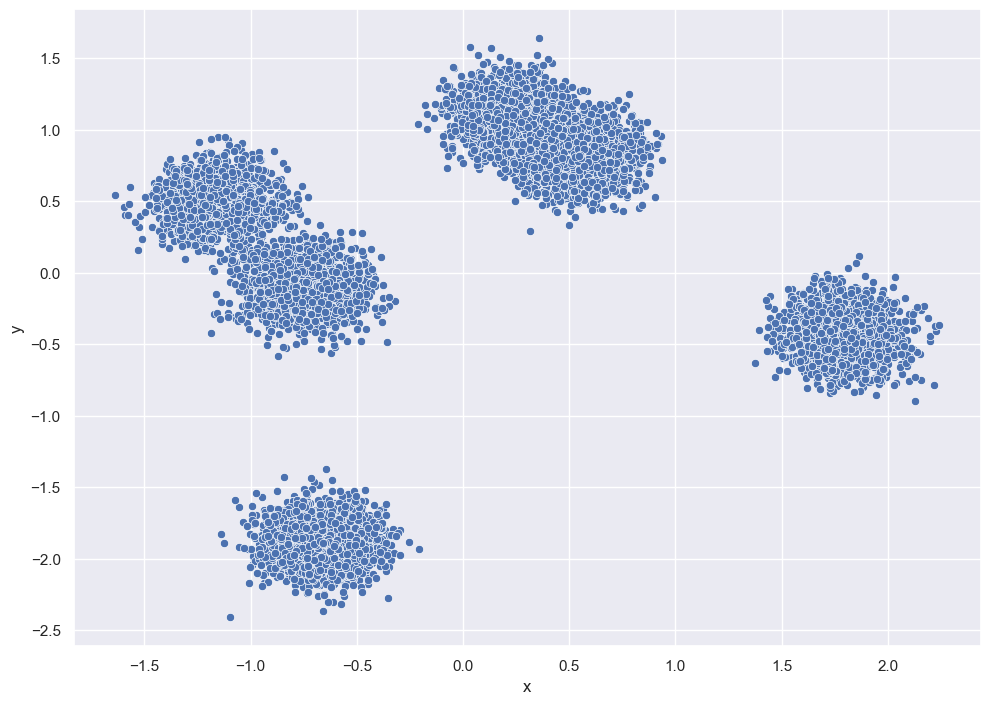

In [5]:
# graficar 
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.scatterplot( data=df,x="x", y="y")


Ajustaremos el algoritmo **KMeans** de **sklearn**. Los hiperparámetros clave son:

- **n_clusters**: Número de clusters, o $ K $. El valor predeterminado es 8.
- **init**: Método de inicialización de centroides. `kmeans++` (predeterminado) mejora la calidad inicial, superando a la inicialización aleatoria.
- **n_init**: Número de ejecuciones del algoritmo con diferentes inicializaciones, eligiendo la que minimiza la inercia.
- **max_iter**: Máximo de iteraciones por ejecución antes de detenerse.
- **random_state**: Semilla para reproducir los resultados.
- **tol**: Tolerancia para el criterio de convergencia; valores mayores detienen el algoritmo más rápido.

In [6]:
# ajustar modelo: k-means

from sklearn.cluster import KMeans

X = np.array(df)
kmeans = KMeans(n_clusters=6,n_init=25, random_state=123)
kmeans.fit(X)


centroids = kmeans.cluster_centers_ # centros 
clusters = kmeans.labels_ # clusters

In [7]:
# etiquetar los datos con los clusters encontrados
df["cluster"] = clusters
df["cluster"] = df["cluster"].astype('category')
centroids_df = pd.DataFrame(centroids, columns=["x", "y"])
centroids_df["cluster"] = [1,2,3,4,5,6]

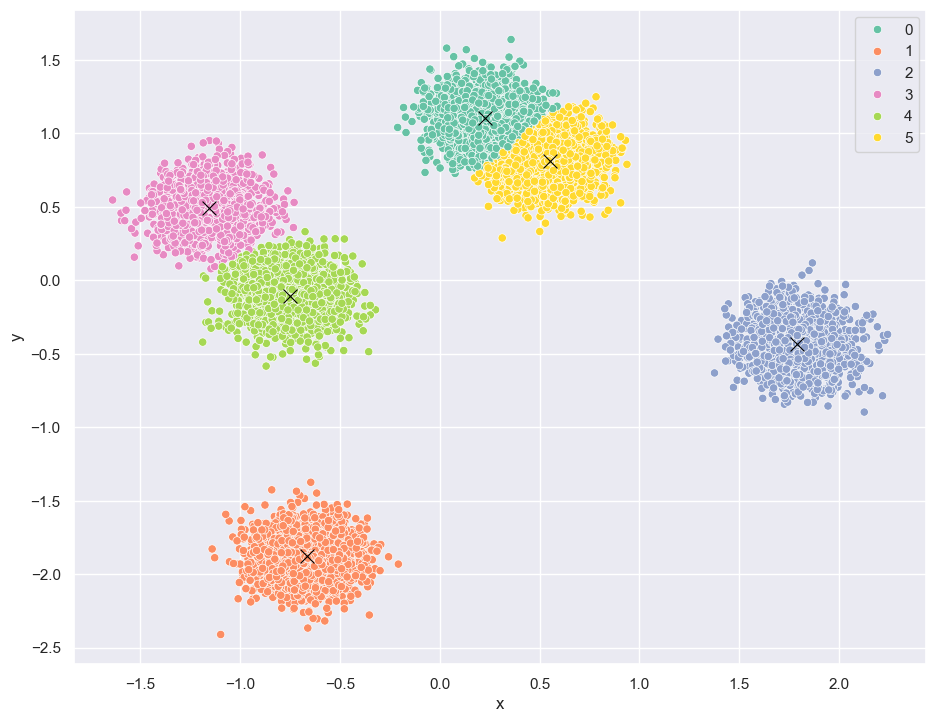

In [8]:
# graficar los datos etiquetados con k-means
fig, ax = plt.subplots(figsize=(11, 8.5))

sns.scatterplot( data=df,
                     x="x",
                     y="y",
                     hue="cluster",
                     legend='full',
                     palette="Set2")

sns.scatterplot(x="x", y="y",
                     s=100, color="black", marker="x",
                     data=centroids_df)
plt.show()



La pregunta natural es: ¿cómo elegir el mejor número de clusters?

No existe un criterio objetivo universal, pero se han desarrollado métodos para orientar esta elección, entre ellos:

- Método del codo (elbow method)
- Criterio de Calinski-Harabasz
- Affinity Propagation (AP)
- Método del gap (y su versión estadística)
- Dendrogramas, entre otros.

#### Método del Codo

Este enfoque evalúa la función de pérdida $ f(C_l, \mu_l) $ al aplicar K-means con diferentes cantidades de clusters, de 1 a $ N $. Al graficar la pérdida en función del número de clusters, se observa un punto de inflexión con forma de "codo". Este punto marca el número óptimo de clusters, donde agregar más clusters aporta cada vez menos reducción en la pérdida.

In [9]:
# implementación de la regla del codo
Nc = range(1, 15)
kmeans = [KMeans(n_clusters=i, n_init=10) for i in Nc]  # Suppressing the warning here
score = [kmeans[i].fit(df).inertia_ for i in range(len(kmeans))]

df_Elbow = pd.DataFrame({'Number of Clusters': Nc, 'Score': score})

df_Elbow.head()

,Number of Clusters,Score
0,1,49176.631100
1,2,23045.751688
2,3,14457.612924
3,4,7042.270693
4,5,1665.378832


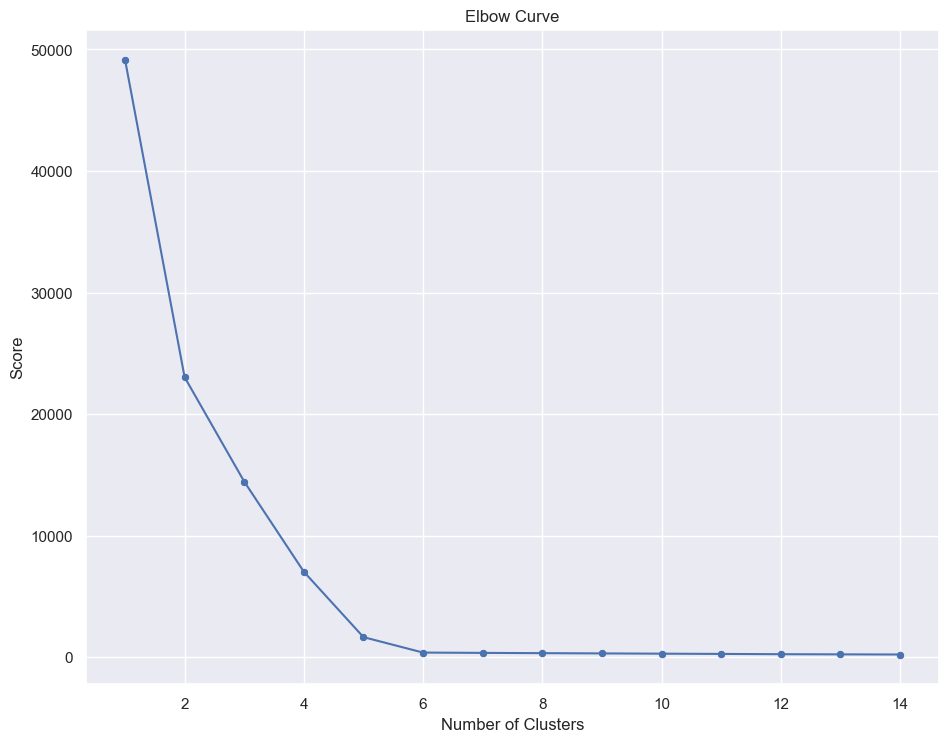

In [10]:
# graficar los datos etiquetados con k-means
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)
plt.show()

A partir de 4 clusters la reducción en la suma total de cuadrados internos parece estabilizarse, indicando que $k$ = 4 es una buena opción.

## Hierarchical clustering


El *Hierarchical Clustering* es un método de agrupamiento que organiza datos en una estructura jerárquica, formando una especie de árbol o dendrograma. Este proceso se divide en dos enfoques principales: **aglomerativo** (ascendente) y **divisivo** (descendente).

1. **Enfoque aglomerativo**: Comienza con cada observación en su propio cluster y, en cada paso, fusiona los clusters más cercanos hasta que todos se combinan en uno solo.
   
2. **Enfoque divisivo**: Comienza con un solo cluster que incluye todas las observaciones y, en cada paso, divide el cluster en dos hasta que cada observación esté en su propio cluster.

**Distancias y Función de Enlace**

El algoritmo depende de dos elementos matemáticos clave:

- **Métrica de distancia**: Mide la similitud entre puntos. Las métricas comunes incluyen la distancia euclidiana y la distancia Manhattan.
  
- **Función de enlace**: Define cómo calcular la distancia entre clusters al combinar o dividir. Entre las funciones de enlace más comunes se encuentran:
  
  - **Enlace completo**: Usa la distancia máxima entre puntos de dos clusters, maximizando la separación entre ellos.
  - **Enlace simple**: Usa la distancia mínima entre puntos de dos clusters, favoreciendo la formación de cadenas de puntos.
  - **Enlace promedio**: Usa la distancia promedio entre puntos de los clusters, ofreciendo un equilibrio entre las anteriores.
  - **Enlace de Ward**: Minimiza la varianza dentro de cada cluster al fusionarlos, buscando una partición compacta.

El resultado se visualiza en un **dendrograma**, donde la altura de las uniones indica la distancia entre clusters. Al seleccionar un corte en el dendrograma, se obtiene el número deseado de clusters.


**Dendrograma**

El **dendrograma** es una representación gráfica de la estructura jerárquica creada por el *hierarchical clustering*. Es un diagrama en forma de árbol que muestra cómo y en qué orden se fusionan o dividen los clusters.

**Interpretación Matemática**

En el dendrograma, cada hoja representa una observación, y cada rama une dos clusters o puntos individuales. La **altura** a la que se realiza cada unión corresponde a la distancia entre los clusters, determinada por la métrica de distancia y la función de enlace elegidas. Matemáticamente, esta altura refleja el nivel de similitud o disimilitud entre los clusters.

**Elección del Número de Clusters**

Para seleccionar un número óptimo de clusters, se puede cortar el dendrograma en un nivel de altura específico. El **corte horizontal** define la cantidad de clusters: cada segmento resultante representa un cluster. En general, se elige el punto donde el incremento en la altura entre uniones consecutivas es mayor, señalando un cambio brusco en la disimilitud.

<img src="https://scikit-learn.org/1.5/_images/sphx_glr_plot_agglomerative_dendrogram_001.png" width = "500" align="center"/>




### Aplicación

En este ejemplo, generaremos un conjunto de datos sintético y aplicaremos Hierarchical Clustering para analizar su estructura. Nuestro objetivo es agrupar las observaciones en clusters y visualizar el proceso jerárquico a través de un dendrograma, identificando el número óptimo de clusters mediante un punto de corte.

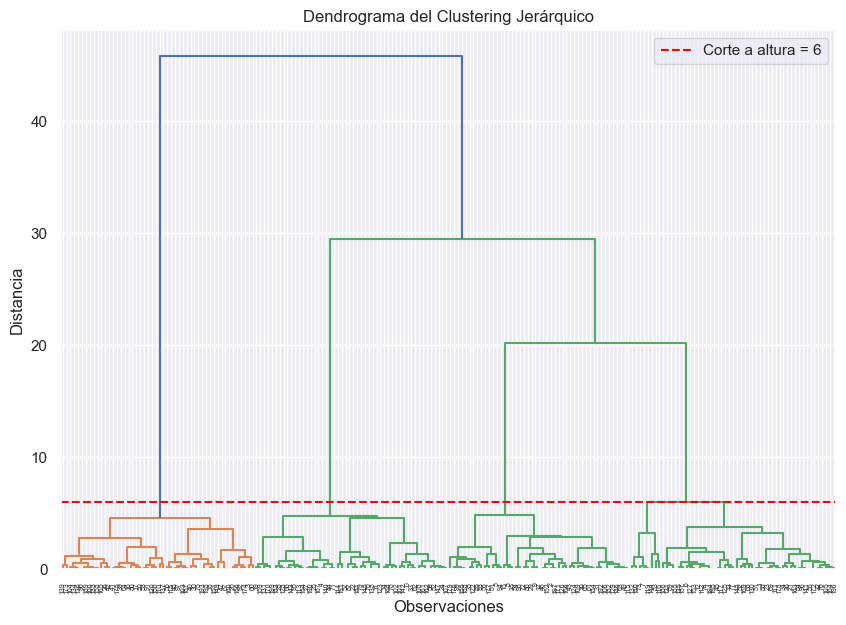

In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# Generar datos
X, y = make_blobs(
    n_samples=200, 
    n_features=2, 
    centers=4, 
    cluster_std=0.60, 
    shuffle=True, 
    random_state=0
)

# Aplicar el clustering jerárquico y calcular los enlaces
Z = linkage(X, method='ward')  # 'ward' minimiza la varianza dentro de los clusters

# Determinar el punto de corte (por ejemplo, a una altura de 6)
cut_height = 6

# Graficar el dendrograma con una línea de corte
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.axhline(y=cut_height, color='red', linestyle='--', label=f'Corte a altura = {cut_height}')
plt.title("Dendrograma del Clustering Jerárquico")
plt.xlabel("Observaciones")
plt.ylabel("Distancia")
plt.legend()
plt.show()



## Density-Based Clustering (DBSCAN)

El **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) es un método de clustering basado en densidad que agrupa puntos en función de su proximidad y densidad local. A diferencia de otros algoritmos de clustering como K-means, DBSCAN no requiere definir el número de clusters de antemano y puede identificar clusters de formas irregulares, además de gestionar puntos de ruido o anomalías.

<img src="https://rust-ml.github.io/book/assets/clustering_comparison.png" align="center"/>


**Conceptos Clave**

DBSCAN utiliza dos parámetros principales:

1. **Radio de vecindad ($ \varepsilon $)**: Define el radio en el que se consideran vecinos los puntos. Todos los puntos dentro de esta distancia de un punto dado se consideran en su "vecindad".

2. **Mínimo de puntos (MinPts)**: Especifica el número mínimo de puntos necesarios para considerar que una región tiene suficiente densidad para formar un cluster.

**Funcionamiento del Algoritmo**

1. **Clasificación de puntos**:
   - **Puntos centrales**: Tienen al menos $ \text{MinPts} $ puntos en su vecindad de radio $ \varepsilon $.
   - **Puntos de borde**: Están dentro de la vecindad de un punto central pero no tienen suficientes vecinos para ser puntos centrales por sí mismos.
   - **Puntos de ruido**: No cumplen con las condiciones de densidad y se consideran puntos aislados.

2. **Expansión de clusters**: 
   - DBSCAN selecciona un punto no visitado y, si es un punto central, inicia un nuevo cluster. Expande este cluster incorporando todos los puntos de su vecindad y continúa el proceso con los nuevos puntos centrales encontrados, hasta que no queden puntos adicionales para agregar.

3. **Identificación de ruido**: Los puntos que no pueden ser alcanzados por ningún cluster se consideran puntos de ruido y se excluyen del clustering.

**Ventajas y Desventajas**

- **Ventajas**: No requiere predefinir el número de clusters, maneja bien clusters de formas arbitrarias y detecta outliers.
- **Desventajas**: Sensible a la elección de los parámetros $ \varepsilon $ y MinPts, y puede tener problemas con clusters de densidades variables.

DBSCAN es útil en aplicaciones donde se espera que los clusters tengan formas no esféricas y se necesite identificar ruido, como en la detección de anomalías y el análisis de datos geoespaciales.




### Aplicación 

Para este ejemplo, generaremos un conjunto de datos sintético con grupos de puntos en diferentes regiones, usando la función `make_moons` de `sklearn.datasets`. Este conjunto de datos produce dos clusters con forma de media luna, que son difíciles de separar mediante métodos de clustering tradicionales como K-means, ya que los clusters no son esféricos y están entrelazados.

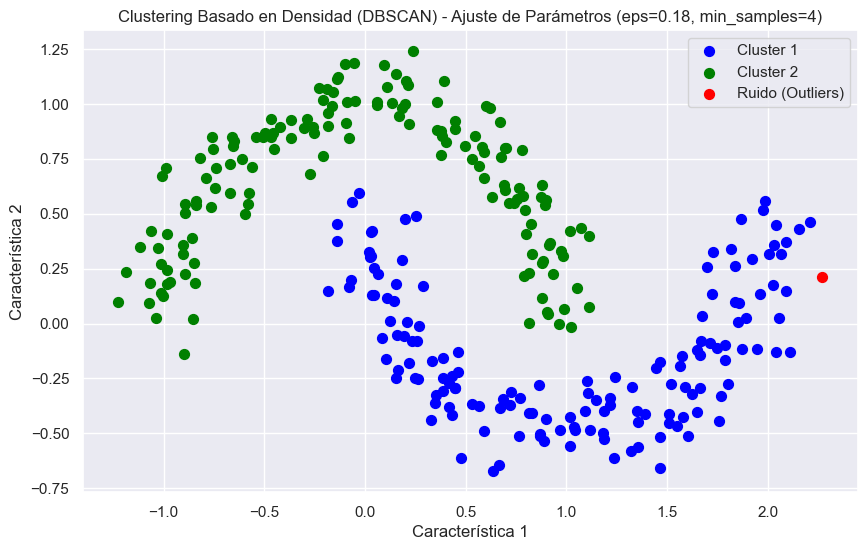

In [45]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generar el conjunto de datos
n_muestras = 300
ruido = 0.1
semilla = 42
X, y = make_moons(n_samples=n_muestras, noise=ruido, random_state=semilla)

# Crear un DataFrame para los datos
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])

# Ajustar DBSCAN con un eps mayor y menos min_samples
eps = 0.18
min_muestras = 4
dbscan = DBSCAN(eps=eps, min_samples=min_muestras)

# Aplicar DBSCAN a los datos
df['Cluster'] = dbscan.fit_predict(df[['Feature1', 'Feature2']])

# Visualización de resultados
plt.figure(figsize=(10, 6))
colores = ['blue', 'green', 'yellow', 'purple', 'orange']
for cluster in df['Cluster'].unique():
    if cluster == -1:
        color, label = 'red', 'Ruido (Outliers)'
    else:
        color, label = colores[cluster % len(colores)], f'Cluster {cluster + 1}'
    
    plt.scatter(df[df['Cluster'] == cluster]['Feature1'], 
                df[df['Cluster'] == cluster]['Feature2'], 
                s=50, color=color, label=label)

plt.title(f"Clustering Basado en Densidad (DBSCAN) - Ajuste de Parámetros (eps={eps}, min_samples={min_muestras})")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.legend()
plt.show()


## Gaussian Mixture Models (GMMs)

Las **Gaussian Mixture Models** (Modelos de Mezcla Gaussiana) son un método de clustering probabilístico que asume que los datos se generan a partir de una combinación de múltiples distribuciones gaussianas (normales). Cada cluster se modela como una distribución gaussiana, y el modelo permite que los clusters se solapen, lo cual es útil cuando los datos no tienen límites claros.

**Conceptos Clave**

1. **Distribución Mixta**: GMM asume que los datos provienen de una mezcla de $ K $ distribuciones gaussianas, cada una con su propia media y varianza. La probabilidad de que un punto pertenezca a un cluster depende de su proximidad a la media de esa gaussiana y de la varianza de la misma.

2. **Asignación Probabilística**: A diferencia de métodos como K-means, donde cada punto pertenece exclusivamente a un cluster, GMM asigna a cada punto una probabilidad de pertenecer a cada cluster. Esto permite modelar mejor los datos que no tienen límites claramente definidos.

3. **Parámetros del Modelo**:
   - **Media ($ \mu $)**: Centro de cada gaussiana.
   - **Varianza ($ \sigma^2 $)**: Dispersión de cada gaussiana.
   - **Peso del Cluster ($ \pi $)**: Representa la proporción de cada cluster en los datos.

**Algoritmo EM (Expectation-Maximization)**

El ajuste de GMM se realiza mediante el algoritmo de Expectación-Maximización (EM), un proceso iterativo que alterna entre dos pasos:

1. **Paso E (Expectation)**: Calcula la probabilidad de que cada punto de datos pertenezca a cada cluster, dado el valor actual de los parámetros.
2. **Paso M (Maximization)**: Actualiza los parámetros de las gaussianas (media, varianza y peso) para maximizar la probabilidad de los datos, dadas las asignaciones de probabilidad calculadas en el Paso E.

Este proceso continúa hasta que las asignaciones de los puntos a los clusters se estabilizan o se alcanza un número máximo de iteraciones.

**Aplicaciones y Ventajas**

GMMs son útiles cuando los datos presentan clusters que pueden solaparse o tener formas elípticas. También son aplicables en tareas de detección de anomalías, reducción de dimensionalidad y segmentación de datos cuando se desea una asignación probabilística de pertenencia a clusters.

### Aplicación

En este ejemplo, generaremos un conjunto de datos sintético utilizando la función `make_blobs` de `sklearn`. Este conjunto de datos consistirá en 300 puntos distribuidos en torno a tres centros o clusters, con una dispersión específica. Utilizaremos GMM para identificar los clusters, lo cual es especialmente útil cuando los clusters tienen forma elíptica o se superponen ligeramente.

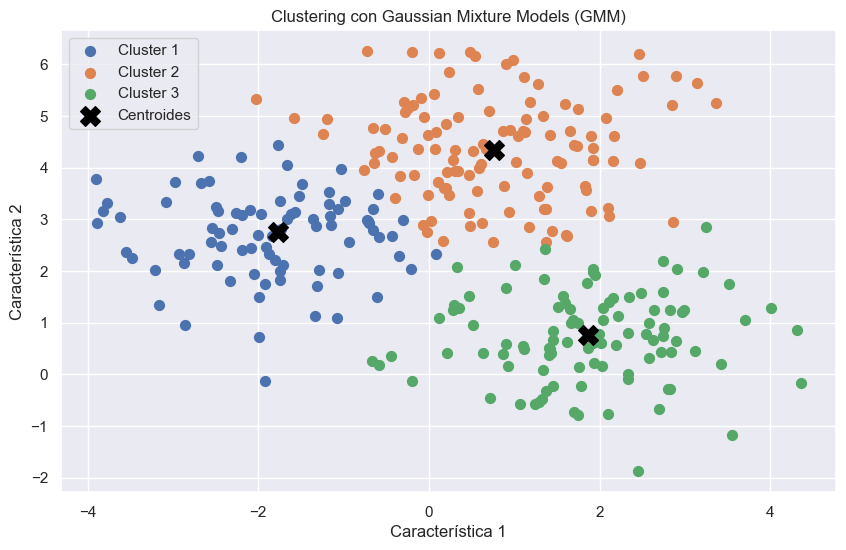

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

# Generar el conjunto de datos
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=0)

# Crear un DataFrame para los datos
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])

# Aplicar Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=0)
df['Cluster'] = gmm.fit_predict(df[['Feature1', 'Feature2']])

# Visualización de resultados
plt.figure(figsize=(10, 6))
for cluster in range(gmm.n_components):
    plt.scatter(df[df['Cluster'] == cluster]['Feature1'], 
                df[df['Cluster'] == cluster]['Feature2'], 
                s=50, label=f'Cluster {cluster + 1}')

# Graficar las medias de cada componente (centroides)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], s=200, c='black', marker='X', label='Centroides')
plt.title("Clustering con Gaussian Mixture Models (GMM)")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.legend()
plt.show()


## Referencias

1. [Unsupervised learning](https://scikit-learn.org/stable/unsupervised_learning.html)
2. [Clustering con Python (Joaquín Amat Rodrigo)](https://www.cienciadedatos.net/documentos/py20-clustering-con-python.html)